In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# A. preg = Number of times pregnant
# B. plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test
# C. pres = Diastolic blood pressure (mm Hg)
# D. skin = Triceps skin fold thickness (mm)
# E. test = 2-Hour serum insulin (mu U/ml)
# F. mass = Body mass index (weight in kg/(height in m)^2)
# g. pedi = Diabetes pedigree function
# H. age = Age (years)
# I. class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

In [3]:
# Reading data
columns = ["pregnant", "glucode", "bp", "skin", "insulin", "bmi", "pedigree", "age", "label"]
data = pd.read_csv("pima-indians-diabetes.csv", header=None, names=columns)
data

,pregnant,glucode,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# Splitting data into train and test
features = ["pregnant", "glucode", "bp", "skin", "insulin", "bmi", "pedigree", "age"]
X = data[features]
Y = data['label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=40)

In [5]:
X_train

,pregnant,glucode,bp,skin,insulin,bmi,pedigree,age
223,7,142,60,33,190,28.8,0.687,61
203,2,99,70,16,44,20.4,0.235,27
112,1,89,76,34,37,31.2,0.192,23
507,1,130,60,23,170,28.6,0.692,21
577,2,118,80,0,0,42.9,0.693,21
...,...,...,...,...,...,...,...,...
440,0,189,104,25,0,34.3,0.435,41
165,6,104,74,18,156,29.9,0.722,41
7,10,115,0,0,0,35.3,0.134,29
219,5,112,66,0,0,37.8,0.261,41


# Fisher's Linear discriminant function

Fisher's Linear discriminant function: y_i = W*x_i

Where <br>
W = S^-1 * (m1-m2); S = S1 + S2

m1 = mean data of class 1 <br>
m2 = mean data of class 2 <br>

S1 = scatter matrix for class 1 <br>
S2 = scatter matrix for class 2 <br>

S = within scatter matrix


Here I am taking 80% data as test data to calculate the cut, and then apply it on the test data to find the accuracy

In [6]:
# Collecting train data which are label 1 ans label 0 seperately
data_positive = X_train[Y_train==1]
data_negative = X_train[Y_train==0]

In [7]:
data_positive

,pregnant,glucode,bp,skin,insulin,bmi,pedigree,age
577,2,118,80,0,0,42.9,0.693,21
16,0,118,84,47,230,45.8,0.551,31
13,1,189,60,23,846,30.1,0.398,59
291,0,107,62,30,74,36.6,0.757,25
188,8,109,76,39,114,27.9,0.640,31
...,...,...,...,...,...,...,...,...
306,10,161,68,23,132,25.5,0.326,47
440,0,189,104,25,0,34.3,0.435,41
165,6,104,74,18,156,29.9,0.722,41
219,5,112,66,0,0,37.8,0.261,41


In [8]:
data_negative

,pregnant,glucode,bp,skin,insulin,bmi,pedigree,age
223,7,142,60,33,190,28.8,0.687,61
203,2,99,70,16,44,20.4,0.235,27
112,1,89,76,34,37,31.2,0.192,23
507,1,130,60,23,170,28.6,0.692,21
640,0,102,86,17,105,29.3,0.695,27
...,...,...,...,...,...,...,...,...
531,0,107,76,0,0,45.3,0.686,24
626,0,125,68,0,0,24.7,0.206,21
268,0,102,52,0,0,25.1,0.078,21
705,6,80,80,36,0,39.8,0.177,28


In [9]:
# Calculating mean of the positive and negative data after converting the data into numpy array
data_pos = np.array(data_positive)
data_neg = np.array(data_negative)

# print(data_pos, "\n", data_neg)

data_pos_mean = np.mean(data_pos, 0)
data_neg_mean = np.mean(data_neg, 0)

print("positive_mean: ", end="")
print(data_pos_mean)
print("negative_mean: ", end="")
print(data_neg_mean)

positive_mean: [  4.99521531 140.88516746  70.88995215  22.35885167  94.89473684
  35.19043062   0.55387081  36.64593301]
negative_mean: [  3.21234568 110.15802469  67.88395062  19.0691358   66.6691358
  30.23481481   0.42275062  31.20493827]


In [10]:
# Calculating scatter matrices

S_positive = len(data_pos)*np.cov(data_pos.T)
print("Scatter for Class positive: ")
print(S_positive)

S_negative = len(data_neg)*np.cov(data_neg.T)
print("Scatter for Class negative: ")
print(S_negative)

Scatter for Class positive: 
[[ 3.22844231e+03 -1.73742788e+03  1.56738942e+03 -9.80331731e+02
  -8.57513462e+03 -9.35284615e+02 -2.16778510e+01  3.79781731e+03]
 [-1.73742788e+03  2.02009798e+05  9.29483173e+03  3.56165385e+03
   2.10744822e+05  3.36868846e+03  5.89469423e+01  6.14188942e+03]
 [ 1.56738942e+03  9.29483173e+03  9.39520000e+04  1.88253269e+04
   3.54371346e+04  4.27563750e+03  7.77691298e+01  1.15963413e+04]
 [-9.80331731e+02  3.56165385e+03  1.88253269e+04  6.85942885e+04
   2.22919495e+05  9.62085048e+03  3.44465851e+02 -1.70661058e+03]
 [-8.57513462e+03  2.10744822e+05  3.54371346e+04  2.22919495e+05
   3.77281342e+06  1.38764841e+04  3.90596038e+02  1.79229663e+04]
 [-9.35284615e+02  3.36868846e+03  4.27563750e+03  9.62085048e+03
   1.38764841e+04  1.18155546e+04  1.02559055e+02 -2.24464808e+03]
 [-2.16778510e+01  5.89469423e+01  7.77691298e+01  3.44465851e+02
   3.90596038e+02  1.02559055e+02  2.94495645e+01 -7.30782163e+01]
 [ 3.79781731e+03  6.14188942e+03  1.159

In [11]:
# Total Scatter matrix
S_total = S_positive + S_negative
print("With in scatter matrix: ")
print(S_total)

With in scatter matrix: 
[[ 6.68671954e+03  1.63029736e+03  3.63146616e+03 -3.58370549e+03
  -2.47385901e+04 -1.25226135e+03 -5.83649896e+01  1.12656317e+04]
 [ 1.63029736e+03  4.97609560e+05  5.29209778e+04  7.58115385e+03
   6.08422919e+05  1.67539102e+04  3.84392472e+02  3.90710800e+04]
 [ 3.63146616e+03  5.29209778e+04  2.36383228e+05  3.98534977e+04
   9.83358896e+04  2.70782766e+04  1.57234620e+02  3.06289676e+04]
 [-3.58370549e+03  7.58115385e+03  3.98534977e+04  1.62927274e+05
   4.78142941e+05  3.07684921e+04  5.19276465e+02 -1.49670908e+04]
 [-2.47385901e+04  6.08422919e+05  9.83358896e+04  4.78142941e+05
   7.88319618e+06  9.22843490e+04  3.58621003e+03 -4.79802960e+04]
 [-1.25226135e+03  1.67539102e+04  2.70782766e+04  3.07684921e+04
   9.22843490e+04  3.53775515e+04  2.35523478e+02 -1.90830724e+03]
 [-5.83649896e+01  3.84392472e+02  1.57234620e+02  5.19276465e+02
   3.58621003e+03  2.35523478e+02  6.23095762e+01 -3.94544960e+01]
 [ 1.12656317e+04  3.90710800e+04  3.0628967

In [12]:
S_inv = inv(S_total)
print("Scatter Inverse: ")
print(S_inv)

Scatter Inverse: 
[[ 1.99904059e-04  1.01470607e-06 -2.47447441e-07 -1.60459280e-07
   2.84585892e-07  3.76226288e-06  1.34452475e-04 -2.82659857e-05]
 [ 1.01470607e-06  2.42687013e-06 -3.15363519e-07  7.04763755e-07
  -2.17499900e-07 -9.59139265e-07 -3.73466177e-06 -1.23121233e-06]
 [-2.47447441e-07 -3.15363519e-07  5.06214684e-06 -9.50592240e-07
   4.06089684e-08 -3.15439795e-06  5.19645734e-06 -1.97619992e-06]
 [-1.60459280e-07  7.04763755e-07 -9.50592240e-07  9.16382790e-06
  -5.08911062e-07 -6.01375334e-06 -2.56267225e-05  1.29599828e-06]
 [ 2.84585892e-07 -2.17499900e-07  4.06089684e-08 -5.08911062e-07
   1.76252055e-07  9.96618181e-08 -4.73507965e-06  6.11641797e-08]
 [ 3.76226288e-06 -9.59139265e-07 -3.15439795e-06 -6.01375334e-06
   9.96618181e-08  3.67991355e-05 -7.67308505e-05  9.21323091e-07]
 [ 1.34452475e-04 -3.73466177e-06  5.19645734e-06 -2.56267225e-05
  -4.73507965e-06 -7.67308505e-05  1.69480944e-02 -2.02134860e-05]
 [-2.82659857e-05 -1.23121233e-06 -1.97619992e-06  

In [13]:
# Calculating the weight vector
W = np.matmul(S_inv, (data_pos_mean-data_neg_mean))
print("Weight vector: ")
print(W)

Weight vector: 
[ 2.76821494e-04  5.96694624e-05 -2.25986483e-05  8.18337415e-06
 -2.54723782e-06  1.28097692e-04  1.65462858e-03  1.24205283e-05]


In [14]:
data_pos_proj = np.matmul(W.T, data_pos_mean)
data_neg_proj = np.matmul(W.T, data_neg_mean)
seperation_boundary = 0.5*(data_pos_proj+data_neg_proj)
print("Positive data projection: " + str(data_pos_proj) + "\nNegative data projection: " + str(data_neg_proj) + \
      "\nSeperation boundary     : " + str(seperation_boundary))

Positive data projection: 0.014007984739081068
Negative data projection: 0.010874545724992038
Seperation boundary     : 0.012441265232036553


In [15]:
# Function to predict class in test data
def predict_class(features):
    estimated_proj = np.matmul(W.T, features)
    
    if(estimated_proj<seperation_boundary):
        return 0
    else:
        return 1

In [16]:
# Predicting the test data class
Y_pred = []
for i in range(len(X_test)):
    Y_pred.append(predict_class(np.array(X_test.iloc[i])))

In [17]:
print("Accuracy:",((Y_pred==Y_test).sum())/len(Y_pred))

Accuracy: 0.7467532467532467


# Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn import metrics

In [19]:
model = DTC(criterion="entropy", max_depth=3)

model = model.fit(X_train, Y_train)

Y_pred_DTC = model.predict(X_test)

In [20]:
print("Accuracy: ", metrics.accuracy_score(Y_test, Y_pred_DTC))

Accuracy:  0.7792207792207793


In [21]:
# pip install pydotplus

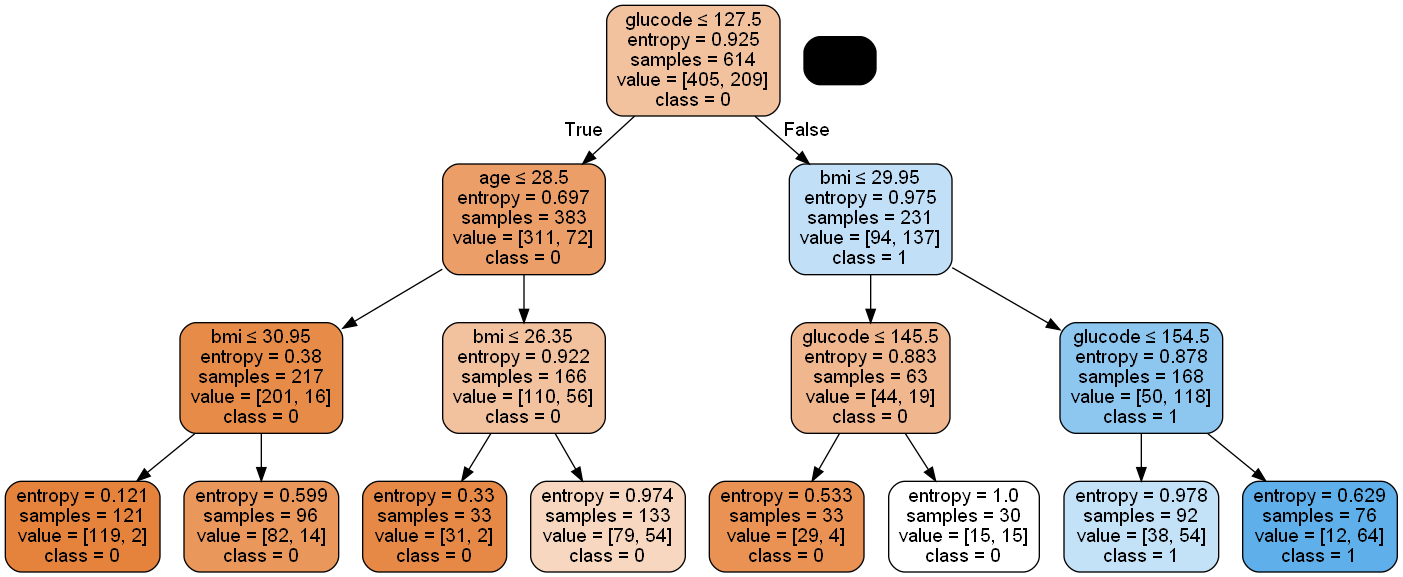

In [22]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data, filled=True, rounded=True, special_characters=True,
               feature_names = features, class_names=['0', '1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('decision_tree.png')
Image(graph.create_png())

Observations:
Decision tree and Fisher's Linear discriminant function performs almost the same since it is a two class classification
